No. of states: 3
No. of transitions: 2
State name: A
Path: 0
Enter end state(s) from state A travelling through path 0: A
Path: 1
Enter end state(s) from state A travelling through path 1: A B
State name: B
Path: 0
Enter end state(s) from state B travelling through path 0: C
Path: 1
Enter end state(s) from state B travelling through path 1: C
State name: C
Path: 0
Enter end state(s) from state C travelling through path 0: 
Path: 1
Enter end state(s) from state C travelling through path 1: 

NFA:
{'A': {'0': ['A'], '1': ['A', 'B']}, 'B': {'0': ['C'], '1': ['C']}, 'C': {'0': [], '1': []}}

Printing NFA table:
     0       1
A  [A]  [A, B]
B  [C]     [C]
C   []      []
Enter final state(s) of NFA:
C

DFA:
{'A': {'0': 'A', '1': 'AB'}, 'AB': {'0': 'AC', '1': 'ABC'}, 'AC': {'0': 'A', '1': 'AB'}, 'ABC': {'0': 'AC', '1': 'ABC'}}

Printing DFA table:
      0    1
A     A   AB
AB   AC  ABC
AC    A   AB
ABC  AC  ABC

Final states of the DFA are: ['AC', 'ABC']


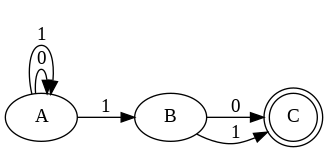

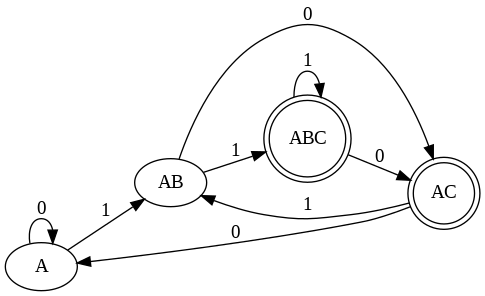

In [ ]:
import pandas as pd
import graphviz
from IPython.display import Image, display

nfa = {}
n = int(input("No. of states: "))
t = int(input("No. of transitions: "))

for i in range(n):
    state = input("State name: ")
    nfa[state] = {}

    for j in range(t):
        path = input("Path: ")
        reaching_states = [x for x in input("Enter end state(s) from state {} travelling through path {}: ".format(state, path)).split()]
        nfa[state][path] = reaching_states

print("\nNFA:")
print(nfa)

print("\nPrinting NFA table:")
nfa_table = pd.DataFrame(nfa)
print(nfa_table.transpose())

print("Enter final state(s) of NFA:")
nfa_final_states = [x for x in input().split()]

new_states_list = []
dfa = {}
keys_list = [list(nfa.keys())[0]]  # Start with the initial state of NFA
path_list = list(nfa[keys_list[0]].keys())

dfa[keys_list[0]] = {}

for y in range(t):
    var = "".join(nfa[keys_list[0]][path_list[y]])
    dfa[keys_list[0]][path_list[y]] = var

    if var not in keys_list:
        new_states_list.append(var)
        keys_list.append(var)

while len(new_states_list) != 0:
    dfa[new_states_list[0]] = {}

    for _ in range(len(new_states_list[0])):
        for i in range(len(path_list)):
            temp = []

            for j in range(len(new_states_list[0])):
                temp += nfa[new_states_list[0][j]][path_list[i]]

            s = "".join(temp)

            if s not in keys_list:
                new_states_list.append(s)
                keys_list.append(s)

            dfa[new_states_list[0]][path_list[i]] = s

    new_states_list.remove(new_states_list[0])

print("\nDFA:")
print(dfa)

print("\nPrinting DFA table:")
dfa_table = pd.DataFrame(dfa)
print(dfa_table.transpose())

dfa_states_list = list(dfa.keys())
dfa_final_states = []

for x in dfa_states_list:
    for i in x:
        if i in nfa_final_states:
            dfa_final_states.append(x)
            break

print("\nFinal states of the DFA are:", dfa_final_states)

# Generate NFA graphical representation
dot_nfa = graphviz.Digraph()
dot_nfa.attr(rankdir='LR')

for state in nfa:
    if state in nfa_final_states:
        dot_nfa.node(state, shape='doublecircle')
    else:
        dot_nfa.node(state)

for state, transitions in nfa.items():
    for symbol, next_states in transitions.items():
        for next_state in next_states:
            dot_nfa.edge(state, next_state, label=symbol)

dot_nfa.render('nfa_graph', format='png')  # Render to PNG file
display(Image(filename='nfa_graph.png'))  # Display the image

# Generate DFA graphical representation
dot_dfa = graphviz.Digraph()
dot_dfa.attr(rankdir='LR')

for state in dfa:
    if state in dfa_final_states:
        dot_dfa.node(state, shape='doublecircle')
    else:
        dot_dfa.node(state)

for state, transitions in dfa.items():
    for symbol, next_state in transitions.items():
        dot_dfa.edge(state, next_state, label=symbol)

# Render the DFA graph to PNG file
dot_dfa.render('dfa_graph', format='png')  # Render to PNG file
# Display the DFA image
display(Image(filename='dfa_graph.png'))  # Display the image